In [10]:
# 匯入必要的庫
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# 檢查 GPU 可用性
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 資料轉換
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 載入 CIFAR-10 資料集
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


In [11]:
# 加載預訓練的 VGG16 模型
model = models.vgg16(pretrained=True)

# 修改輸出層以適應 CIFAR-10（10 個類別）
model.classifier[6] = nn.Linear(4096, 10)
model = model.to(device)


In [12]:
# 定義損失函數與優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [13]:
# 訓練與驗證函數
def train_and_validate(model, train_loader, test_loader, epochs):
    train_losses, test_losses, accuracies = [], [], []

    for epoch in range(epochs):
        # 訓練
        model.train()
        running_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # 驗證
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        test_losses.append(test_loss / len(test_loader))
        accuracy = correct / total
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, "
              f"Test Loss: {test_losses[-1]:.4f}, "
              f"Accuracy: {accuracy:.4f}")

    return train_losses, test_losses, accuracies


In [14]:
# 訓練模型
epochs = 10
train_losses, test_losses, accuracies = train_and_validate(model, train_loader, test_loader, epochs)


Epoch 1/10, Train Loss: 0.6903, Test Loss: 0.5327, Accuracy: 0.8255
Epoch 2/10, Train Loss: 0.3570, Test Loss: 0.4272, Accuracy: 0.8603
Epoch 3/10, Train Loss: 0.2292, Test Loss: 0.4280, Accuracy: 0.8679
Epoch 4/10, Train Loss: 0.1519, Test Loss: 0.4290, Accuracy: 0.8765
Epoch 5/10, Train Loss: 0.1068, Test Loss: 0.4842, Accuracy: 0.8687
Epoch 6/10, Train Loss: 0.0830, Test Loss: 0.5587, Accuracy: 0.8677
Epoch 7/10, Train Loss: 0.0755, Test Loss: 0.4844, Accuracy: 0.8800
Epoch 8/10, Train Loss: 0.0613, Test Loss: 0.6155, Accuracy: 0.8710
Epoch 9/10, Train Loss: 0.0518, Test Loss: 0.6395, Accuracy: 0.8642
Epoch 10/10, Train Loss: 0.0486, Test Loss: 0.6728, Accuracy: 0.8772


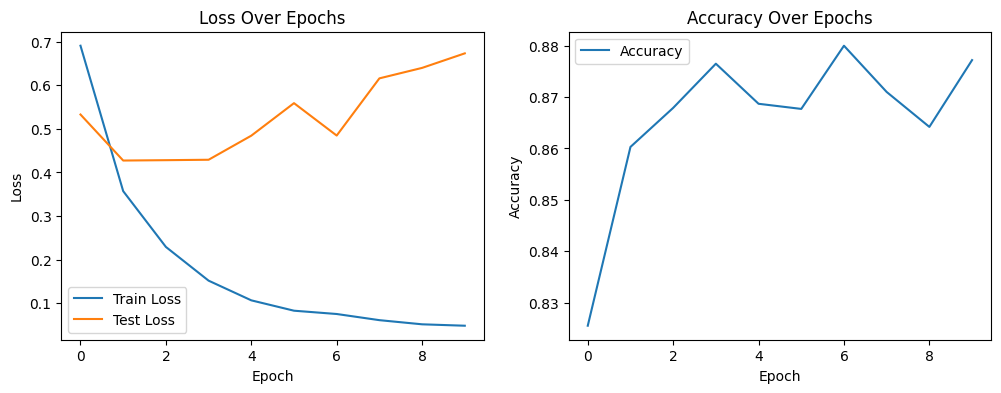

In [15]:
import matplotlib.pyplot as plt

# 繪製損失與準確率圖表
plt.figure(figsize=(12, 4))

# 損失
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 準確率
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [16]:
# 模型測試
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Final Test Accuracy: {correct / total:.4f}")


Final Test Accuracy: 0.8772
